In [36]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, leastsq, minimize_scalar, curve_fit, minimize
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.io import loadmat
from IPython.display import display, Math
import matplotlib as mpl
import matplotlib
plt.rcParams.update({'font.size': 18})


from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


C:\Users\Quentin\AppData\Local\Temp\ipykernel_10708\2542303747.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


1. [Select Plotting Parameters](#1.-Parameters)
2. [Load and prepare the data](#2.-Loading)
3. [Plot figure 1](#3.-Plotting-fig1)
4. [Plot figure 2](#4.-Plotting-fig-2)
5. [Plot figure 3](#5.-Plotting-fig-3)
6. [Plot figure 4](#6.-Plotting-fig-4)


### 1. Parameters

In [55]:
#Chose the dataset you want to include
use_chanil    = True
use_shen      = True
use_kang      = False
use_kang100   = False
use_marj      = False #refers to the set of simulations I got on July 2022
use_giuliana  = False  #refers to the set of simulations in the report, sent on October 2022 (actually not from giuliana)
use_gerardo   = False # refers to reports
# there are a lot of simulations from Marjolaine's group. If we want to reduce the number of displayed simulations, we can select only some parameters 
select_Ns     = np.array([60, 120, 240, 360])   # Full range: [60, 120, 240, 360]
select_dDs    = np.array([0.2, 0.6, 1, 1.5, 2]) # Full range: [0.2, 0.6, 1, 1.5, 2]

show_errorbar = True #Note that we only have these for giuliana and gerardo sim

#label to display for each
chanil_label  = 'Chanil et al.: $N=50$'
shen_label    = 'Shendruck et al.:$N=15$'
kang_label    = 'Kang et al.: $N=50$'
k100_label    = 'Kang et al.: $N=100$'
marj_label    = 'Giulinana\'s simulations'
giu_label     = 'Gerardo\'s (N=60,120)'
ger_label     = 'Gerardo\'s (N=60,120)'

#which marker
fmt_chanil     = '^'
fmt_shen       = 'o'
fmt_giuliana   = 'sk'
fmt_gerardo60  = 's'
fmt_gerardo120 = 'd'
fmt_kang       = 'dk'

black_and_white = False

#Chose the x-axis

#scaling_param = 'phi'
#scaling_param = 'kang'
scaling_param = 'ha'

### 2. Loading

In [56]:
# Load and prepare the data

# JC data are expressed in terms of Rg/Rg(0)
N_JC       = 50
phi3_JC    = np.load('data/Chanil/phi3.npy') 
alpha3     = np.load('data/Chanil/alpha3.npy')
phi4_JC    = np.load('data/Chanil/phi4.npy') 
alpha4     = np.load('data/Chanil/alpha4.npy')
phi5_JC    = np.load('data/Chanil/phi5.npy') 
alpha5     = np.load('data/Chanil/alpha5.npy')
D_JC       = 1
d_JC       = np.array([0.3, 0.4, 0.5])*D_JC
b_JC       = D_JC

phi_JC     = [phi3_JC, phi4_JC, phi5_JC]


# Shenduck data are expressed in terms of Rg
N_shen     = 15
phi_shen   = [np.load('data/data_shendruck/ph3_shen.npy'), np.load('data/data_shendruck/ph4_shen.npy'), np.load('data/data_shendruck/ph5_shen.npy')]
Rgs_shen   = [np.load('data/data_shendruck/Rg3_shen.npy'), np.load('data/data_shendruck/Rg4_shen.npy'), np.load('data/data_shendruck/Rg5_shen.npy')]
d_shen     = sig = 1
D_shen     = np.array([1.5, 2, 2.5])*2*sig
# D_shen toi vas-y donne tout

# Ideal chain: Rg = R/sqrt(6) = b/sqrt(6)*sqrt(N)
Rg0        = D_shen*N_shen**(1/2)/np.sqrt(6)
alpha_shen = [Rgs_shen[0]/Rg0[0], Rgs_shen[1]/Rg0[1], Rgs_shen[2]/Rg0[2]]
#'''
def normalizing(a):
    x = 3/5*N_shen**(1/2)
    y = 1/5
    x = 0.5*N_shen**(1/2)
    y = 1/6
    return a**5 - a**3 - y/a**3 - x
f_init     = fsolve(normalizing, x0=1)
alpha_shen = [f_init*Rgs_shen[0]/max(Rgs_shen[0]), f_init*Rgs_shen[1]/max(Rgs_shen[1]), f_init*Rgs_shen[2]/max(Rgs_shen[2])]

#'''

'''
# Kang's data are expressed in terms of Rg/Rg(0)
N_kang    = 50
phi_kang  = np.load('data/ph_kang.npy')
ag_kang   = np.load('data/ag_kang.npy')
lamb_kang = 47 #lambda = Rg(0)/d ~? D/d/6^(1/2)*N^{3/5}
dkang     = N_kang**(3/5)/lamb_kang/6**(1/2)
# Then x = lambda*2^{6/5}/N^{1/2}*phi

# 2 different lengthes are tested
N_kang100 = 100
phi_k100  = [np.load('data/ph09_kang.npy'), np.load('data/ph19_kang.npy'), np.load('data/ph38_kang.npy'), np.load('data/ph69_kang.npy')]
ag100_k   = [np.load('data/ag09_kang.npy'), np.load('data/ag19_kang.npy'), np.load('data/ag38_kang.npy'), np.load('data/ag69_kang.npy')]
lamb_k100 = np.array([0.9, 1.9, 3.8, 6.9])
dkang100  = N_kang100**(3/5)/lamb_k100/6**(1/2)
'''

# Giulinana's simulations are given in terms of Rg
rg_marj  = np.load('data\Marj\\rg.npy')
std_marj = np.load('data\Marj\\std.npy')
N_marj   = np.load('data\Marj\\Nvec.npy')
phi_marj = np.load('data\Marj\\phivec.npy')
dD_marj  = np.load('data\Marj\\dDvec.npy')

N_plot = np.zeros(len(N_marj))
if any(select_Ns==60):
    N_plot[0]=1
if any(select_Ns==120):
    N_plot[1]=1
if any(select_Ns==240):
    N_plot[2]=1
if any(select_Ns==360):
    N_plot[3]=1

d_plot = np.zeros(len(dD_marj))
if any(select_dDs==0.2):
    d_plot[0] = 1
if any(select_dDs==0.6):
    d_plot[1] = 1
if any(select_dDs==1):
    d_plot[2] = 1
if any(select_dDs==1.5):
    d_plot[3] = 1
if any(select_dDs==2):
    d_plot[4] = 1

rg_giu  = np.load('data\giuliana\Rg_giu.npy')
std_giu = np.load('data\giuliana\std_giu.npy')
xHa_giu = np.load('data\giuliana\\xHa.npy')
dD_giu  = np.load('data\giuliana\dD.npy')
N_giu   = np.array([60,120])
#we do not have the 1st point, so normalize with lambda*N^0.588=D/2 N^0.588
alphag_giu = np.array([rg_giu[0,:,:]*2/N_giu[0]**0.588,rg_giu[1,:,:]*2/N_giu[1]**0.588])
stda_giu   = np.array([std_giu[0,:,:]*2/N_giu[0]**0.588,std_giu[1,:,:]*2/N_giu[1]**0.588])

# Gerardo's simulations are given in terms of Rg
rg_ger     = np.load('data\gerardo\Rg_ger.npy')
std_ger    = np.load('data\gerardo\SE_ger.npy')
xHa_ger    = np.load('data\gerardo\\xHa.npy')
dD_ger     = np.load('data\gerardo\dD.npy')
N_ger      = np.array([60,120])
alphag_ger = np.array([rg_ger[0,:,:]/rg_ger[0,0,0],rg_ger[1,:,:]/rg_ger[1,0,0]])
stda_ger   = np.array([alphag_ger[0,:,:]*(std_ger[0,:,:]/rg_ger[0,:,:]+std_ger[0,0,0]/rg_ger[0,0,0]),alphag_ger[1,:,:]*(std_ger[1,:,:]/rg_ger[1,:,:]+std_ger[1,0,0]/rg_ger[1,0,0])])


def normalizing(a, N=N_JC):
    #x = 3/5*N**(1/2)
    #y = 1/5
    x = 0.5*N**(1/2)
    #y = 10/6 #10 times bigger, as a test for gerardo's observation
    y = 1/6
    return a**5 - a**3 - y/a**3 - x

f_init     = fsolve(normalizing, x0=1)
#f_init100  = fsolve(lambda a: normalizing(a, N_kang100), x0=1)
f_init60   = fsolve(lambda a: normalizing(a, 60), x0=1)
f_init120  = fsolve(lambda a: normalizing(a, 120), x0=1)

alpha_marj = np.empty(rg_marj.shape)
std_marj   = np.empty(rg_marj.shape)
for i in range(len(N_plot)):
    if N_plot[i]:
        f_init_marj = fsolve(lambda a: normalizing(a, N_marj[i]), x0=1)
        for j in range(len(dD_marj)):
            alpha_marj[i,:,j] = f_init_marj*rg_marj[i,:,j]/rg_marj[i,0,j]
            std_marj[i,:,j]   = alpha_marj[i,:,j]*(std_marj[i,:,j]/rg_marj[i,:,j]+std_marj[i,0,j]/rg_marj[i,0,j])

alpha_JC   = [f_init*alpha3, f_init*alpha4, f_init*alpha5]
#alpha_kang = f_init*ag_kang
#alpha_k100 = [f_init100*ag100_k[0], f_init100*ag100_k[1], f_init100*ag100_k[2], f_init100*ag100_k[3]]
#alpha_giu  = np.array([alphag_giu[0]*f_init60, alphag_giu[1]*f_init120])
#stda_giu   = np.array([stda_giu[0]*f_init60, stda_giu[1]*f_init120])
#alpha_ger  = np.array([alphag_ger[0]*f_init60, alphag_ger[1]*f_init120])
#stda_ger   = np.array([stda_ger[0]*f_init60, stda_ger[1]*f_init120])


In [57]:
# Make list of all selected data and their corresponding label, color, marker etc.

phi        = []
alpha      = []
std        = []
N          = []
dD         = []
tic        = []
D          = []
lab        = []
boolplot   = []
c          = []
c_ind      = 0

if black_and_white:
    colors = ['k']*30
else:
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors     = prop_cycle.by_key()['color']
#wow
 
if use_chanil:
    phi.extend(phi_JC)
    alpha.extend(alpha_JC)
    std.extend((None,None,None))
    N.extend((N_JC,N_JC,N_JC))
    dD.extend(d_JC)
    tic.extend((fmt_chanil, fmt_chanil, fmt_chanil))
    D.extend((1,1,1))
    c.extend((colors[c_ind],colors[c_ind],colors[c_ind]))
    lab.extend((chanil_label+' d/D=%.2f'%(d_JC[0]),chanil_label+' d/D=%.2f'%(d_JC[1]),chanil_label+' d/D=%.2f'%(d_JC[2])))
    boolplot.extend((True,True,True))
    c_ind = c_ind+1
if use_shen:
    phi.extend(phi_shen)
    alpha.extend(alpha_shen)
    std.extend((None,None,None))
    N.extend((N_shen,N_shen,N_shen))
    dD.extend(d_shen/D_shen)
    tic.extend((fmt_shen, fmt_shen, fmt_shen))
    D.extend(D_shen)
    lab.extend((shen_label+' d/D=%.1f'%(d_shen/D_shen[0]),shen_label+' d/D=%.1f'%(d_shen/D_shen[1]),shen_label+' d/D=%.1f'%(d_shen/D_shen[2])))
    boolplot.extend((True,True, True))
    c.extend((colors[c_ind],colors[c_ind],colors[c_ind]))
    c_ind = c_ind+1
if use_kang:
    phi.append(phi_kang)
    alpha.append(alpha_kang)
    std.append(None)
    N.append(N_kang)
    dD.append(dkang)
    tic.append(fmt_kang)
    D.append(1)
    c.append(colors[c_ind])
    lab.append(kang_label)
    boolplot.append(True)
    c_ind = c_ind+1
if use_kang:
    phi.extend(phi_k100)
    alpha.extend(alpha_k100)
    std.extend((None,None,None,None))
    N.extend((N_kang100,N_kang100,N_kang100,N_kang100))
    dD.extend(dkang100)
    tic.extend((fmt_kang,fmt_kang,fmt_kang,fmt_kang))
    D.extend((1,1,1,1))
    c.extend((colors[c_ind],colors[c_ind],colors[c_ind],colors[c_ind]))
    lab.extend((k100_label,k100_label,k100_label,k100_label))
    boolplot.extend((True,False,False,False))
    c_ind = c_ind+1
if use_marj:
    labelled = False
    for i in range(len(N_marj)):
        for j in range(len(dD_marj)):
            if (N_plot[i] and d_plot[j]):
                phi.append(phi_marj)
                alpha.append(alpha_marj[i,:,j])
                std.append(std_marj[i,:,j])
                N.append(N_marj[i])
                dD.append(dD_marj[j])
                tic.append('+-.')
                D.append(1)
                c.append(colors[c_ind])
                lab.append(marj_label)
                if np.invert(labelled):
                    boolplot.append(True)
                    labelled = True
                else:
                    boolplot.append(False)
    c_ind = c_ind+1
if use_giuliana:
    labelled = False
    for i in range(len(N_giu)):
        for j in range(len(dD_giu)):
            phi.append(xHa_giu*dD_giu[j])
            alpha.append(alpha_giu[i,j,:])
            std.append(stda_giu[i,j,:])
            N.append(N_giu[i])
            dD.append(dD_giu[j])
            tic.append(fmt_giuliana)
            D.append(1)
            c.append(colors[c_ind])
            lab.append(giu_label)
            if np.invert(labelled):
                boolplot.append(True)
                labelled = True
            else:
                boolplot.append(False)
        c_ind = c_ind+1
if use_gerardo:
    labelled = False
    for i in range(len(N_ger)):
        for j in range(len(dD_ger)):
            phi.append(xHa_ger*dD_ger[j])
            alpha.append(alpha_ger[i,j,:])
            std.append(stda_ger[i,j,:])
            N.append(N_ger[i])
            dD.append(dD_ger[j])
            if N_ger[i]==60:
                tic.append(fmt_gerardo60)
                c.append(colors[c_ind])
            else:
                tic.append(fmt_gerardo120)
                c.append(colors[c_ind-4])
            D.append(1)
            lab.append(ger_label)
            if np.invert(labelled):
                boolplot.append(True)
                labelled = True
            else:
                boolplot.append(False)
            c_ind = c_ind+1


#if len(c)<10:
    #c = colors
    
#phi        = [*phi_JC, *phi_shen,phi_kang]
#alpha      = [*alpha_JC, *alpha_shen,alpha_kang]
#N          = np.array([N_JC, N_JC, N_JC, N_shen, N_shen, N_shen,N_kang])
#dD         = np.array([*d_JC, *np.array(d_shen/D_shen),dkang])
#tic        = ['o-', 'o-', 'o-', '^--', '^--', '^--','s:']
#lab        = []
#D          = np.array([1,1,1,*D_shen,1])
#for i in range(len(N)):
#    lab.append('d/D = {:.2f}, N = {:.0f}'.format(dD[i], N[i]))

### 3. Plotting fig1

<IPython.core.display.Javascript object>


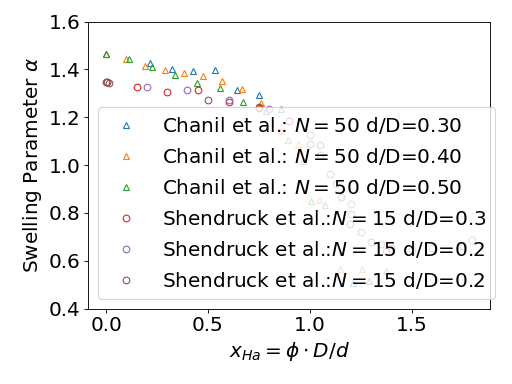

"\nif show_errorbar:\n    plt.savefig('article_figures/a_xHa_error.pdf')\nelse:\n    plt.savefig('article_figures/a_xHa_no_error.pdf')\n"

In [58]:
# Plot the figure
#scaling_param='kang'
c = colors
xlab = 'Error: scaling parameter badly specified'
if scaling_param=='phi':
    xlab = '$\phi$'
elif scaling_param=='kang':
    xlab = '$x_{kang}=R_g(0)\\phi^{1/3}D/d$'
elif scaling_param=='ha':
    xlab = '$x_{Ha}=\\phi\\cdot D/d$'

plt.figure()
plt.xlabel(xlab)
plt.ylabel(r'Swelling Parameter $\alpha$')
for i in range(len(N)):
    if scaling_param=='phi':
        x_sc = phi[i]
    elif scaling_param=='kang':
        x_sc = alpha[i][0]*D[i]*N[i]**(1/2)/dD[i]*phi[i]**(1/3)
    elif scaling_param=='ha':
        x_sc = phi[i]/dD[i]
    
    if boolplot[i]:
        if show_errorbar:
            #plt.errorbar(phi[i], alpha[i], std[i], fmt=tic[i], label=lab[i], color=c[i])
            plt.errorbar(x_sc, alpha[i], std[i], fmt=tic[i], label=lab[i], color=c[i], fillstyle='none')
        else:
            #plt.plot(phi[i], alpha[i], tic[i], label=lab[i], color=c[i])
            plt.plot(x_sc, alpha[i], tic[i], label=lab[i], color=c[i], fillstyle='none')
    else:
        if show_errorbar:
            plt.errorbar(x_sc, alpha[i], std[i], fmt=tic[i], color=c[i], fillstyle='none')
        else:
            plt.plot(x_sc, alpha[i], tic[i], color=c[i], fillstyle='none')
#plt.legend()
plt.tight_layout()
'''
if show_errorbar:
    plt.savefig('article_figures/a_xHa_error.pdf')
else:
    plt.savefig('article_figures/a_xHa_no_error.pdf')
'''

In [59]:
plt.legend()


In [60]:
plt.ylim([0.4, 1.6])
#plt.xlim([-0.2, 1.9])

(0.4, 1.6)

In [61]:
#plt.savefig('')

### 4. Plotting fig 2

<IPython.core.display.Javascript object>


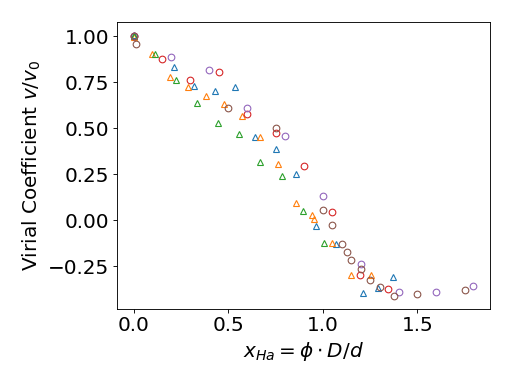

In [62]:
vv0 =  []
stdv = []


plt.figure()
#plt.title('Simulations for: \ncircles: J.Chanil et al. (Ha group) \nTriangles: T.N.Shendruck')
plt.xlabel(xlab)
plt.ylabel(r'Virial Coefficient $v/v_0$')
for i in range(len(N)):
    #x  = 3/5*N[i]**(1/2)
    #y  = 1/5
    x  = 0.5*N[i]**(1/2)
    #y  = 10/6
    y  = 1/6
    v  = np.array((alpha[i]**5 - alpha[i]**3 - y/alpha[i]**3)/x)
    if std[i] is None:
        dv = None
    else:
        dv = np.sqrt((5*alpha[i]**4)**2+(3*alpha[i]**2)**2+(3*y/alpha[i]**4)**2)*std[i]/x
        
    if scaling_param=='phi':
        x_sc = phi[i]
    elif scaling_param=='kang':
        x_sc = alpha[i][0]*D[i]*N[i]**(1/2)/dD[i]*phi[i]**(1/3)
    elif scaling_param=='ha':
        x_sc = phi[i]/dD[i]
    
    if boolplot[i]:
        if show_errorbar:
            plt.errorbar(x_sc, v, dv, fmt=tic[i], label=lab[i], color=c[i], fillstyle='none')
        else:
            plt.plot(x_sc, v, tic[i], label=lab[i], color=c[i], fillstyle='none')
    else:
        if show_errorbar:
            plt.errorbar(x_sc, v, dv, fmt=tic[i], color=c[i], fillstyle='none')
        else:
            plt.plot(x_sc, v, tic[i], color=c[i], fillstyle='none')
    stdv.append(dv)    
    vv0.append(v)
#plt.legend()
plt.tight_layout()
#if show_errorbar:
    #plt.savefig('article_figures/v_xHa_error.pdf')
#else:
    #plt.savefig('article_figures/v_xHa_no_error.pdf')

In [46]:
#plt.savefig('C:\\Users\\Quentin\\Documents\\DNA_cond\\figs\\fig2\\1half_fig.svg')

In [47]:
plt.ylim([-0.5, 1.2])
#plt.xlim([-0.2, 1.9])

(-0.5, 1.2)

<IPython.core.display.Javascript object>


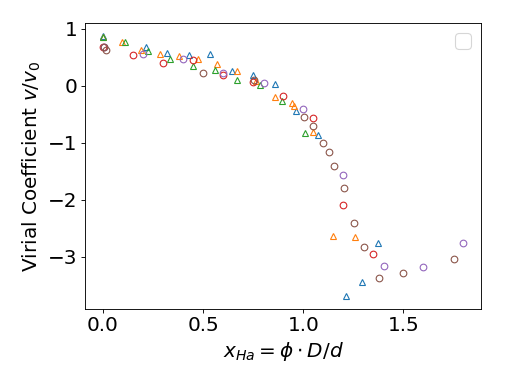

In [48]:
vv0 =  []
stdv = []

c = colors

plt.figure()
#plt.title('Simulations for: \ncircles: J.Chanil et al. (Ha group) \nTriangles: T.N.Shendruck')
plt.xlabel(xlab)
plt.ylabel(r'Virial Coefficient $v/v_0$')
for i in range(len(N)):
    #x  = 3/5*N[i]**(1/2)
    #y  = 1/5
    x  = 0.5*N[i]**(1/2)
    y  = 10/6
    #y  = 1/6
    v  = np.array((alpha[i]**5 - alpha[i]**3 - y/alpha[i]**3)/x)
    if std[i] is None:
        dv = None
    else:
        dv = np.sqrt((5*alpha[i]**4)**2+(3*alpha[i]**2)**2+(3*y/alpha[i]**4)**2)*std[i]/x
        
    if scaling_param=='phi':
        x_sc = phi[i]
    elif scaling_param=='kang':
        x_sc = alpha[i][0]*D[i]*N[i]**(1/2)/dD[i]*phi[i]**(1/3)
    elif scaling_param=='ha':
        x_sc = phi[i]/dD[i]
    
    if boolplot[i]:
        if show_errorbar:
            plt.errorbar(x_sc, v, dv, fmt=tic[i], label=lab[i], color=c[i], fillstyle='none')
        else:
            plt.plot(x_sc, v, tic[i], label=lab[i], color=c[i], fillstyle='none')
    else:
        if show_errorbar:
            plt.errorbar(x_sc, v, dv, fmt=tic[i], color=c[i], fillstyle='none')
        else:
            plt.plot(x_sc, v, tic[i], color=c[i], fillstyle='none')
    stdv.append(dv)    
    vv0.append(v)
plt.legend()
plt.tight_layout()
#if show_errorbar:
#    plt.savefig('article_figures/v_xHa_error.pdf')
#else:
#    plt.savefig('article_figures/v_xHa_no_error.pdf')

In [49]:
plt.legend('')

In [50]:
#plt.savefig('C:\\Users\\Quentin\\Documents\\DNA_cond\\figs\\fig2\\1half_fig.svg')

<IPython.core.display.Javascript object>


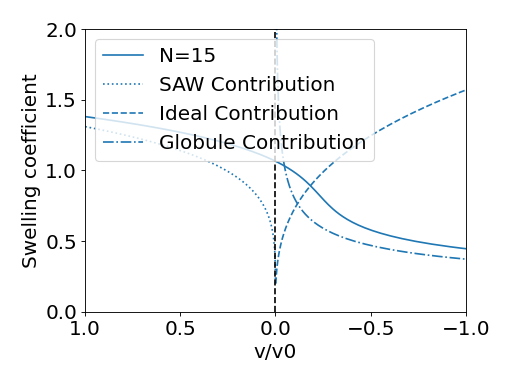

In [51]:
N = np.array([15, 50, 100])
N = np.array([15])

al = np.linspace(0.2, 5, 500)
vv0 = np.linspace(-1,1,100)

plt.figure()
for i in range(len(N)):
    vv0_i = (al**5-al**3-1/5/al**3)/np.sqrt(N[i])/3*5
    plt.plot(vv0_i, al, label='N=%.0f'%N[i])
    #plt.plot(vv0, N[i]**0.1*vv0**(0.2),':', color=plt.gca().lines[-1].get_color())
    #plt.plot((-al**3-1/5/al**3)/N[i]**0.5, al,'-.', color=plt.gca().lines[-1].get_color())
    plt.plot(al**5/N[i]**0.5, al,':', color=plt.gca().lines[-1].get_color(),label='SAW Contribution')
    plt.plot(-al**3/N[i]**0.5, al,'--', color=plt.gca().lines[-1].get_color(),label='Ideal Contribution')
    plt.plot(-1/5/al**3/N[i]**0.5, al,'-.', color=plt.gca().lines[-1].get_color(),label='Globule Contribution')
plt.gca().axvline(0,ls='--',color='k')
plt.ylabel('Swelling coefficient')
plt.xlabel('v/v0')
plt.xlim([1,-1])
plt.ylim([0,3])
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
plt.xlim([1,-1])
plt.ylim([0,2])

(0.0, 2.0)

In [53]:
#plt.savefig('')

### 5. Plotting fig 3

<IPython.core.display.Javascript object>


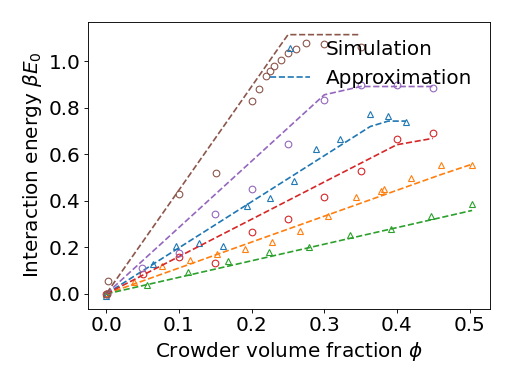

In [91]:
# adapted from the code 'phenomenological_formula_wo_N.ipynb' part 2

shell = (1+np.array(dD))**3 - 1
E0    = []
e0_tot = []
phi_tot = []

c = colors

plt.figure()
plt.xlabel('Crowder volume fraction $\\phi$')
plt.ylabel('Interaction energy $\\beta E_0$')

for i in range(len(vv0)):
    e0 = np.log(1-(vv0[i]-1)/shell[i]) # Interaction energy from simulations
    E0.append(e0)
    
    #plt.plot(phi[i], e0, '+-', label='d/D={:.2f}'.format(dD[i]))
    x               = phi[i]/dD[i]
    
    lin = x<=1.25 
    e0_tot = [*e0_tot, *e0[lin]*1.25*dD[i]**2]
    phi_tot = [*phi_tot, *phi[i][lin]]
    
    E0_plateau_appr = 0.223/dD[i] # Approximation for the plateau 
    E0_plateau      = np.log(1+1.35/shell[i]) # Plateau energy, from (v/v0)_plateau and the inverted mayer formula
    #E0_plateau      = np.log(1+4/shell[i]) # Plateau energy, from (v/v0)_plateau and the inverted mayer formula    
    E0_appr         = E0_plateau_appr/1.25/dD[i]*phi[i]*(x<=1.25) + E0_plateau_appr*(x>1.25)
    E0_formul       = E0_plateau/1.25/dD[i]*phi[i]*(x<=1.25) + E0_plateau*(x>1.25)
    
    if i==0: #This is to have only the legend for the 1st curve. There is probably another way
        plt.plot(phi[i], e0, tic[i], label='Simulation', fillstyle='none')
        c1 = plt.gca().lines[-1].get_color()
        #plt.plot(phi[i], E0_formul, '-', label='Formula', color=c1)
        plt.plot(phi[i], E0_appr, '--', label='Approximation', color=c1)
    else:
        #plt.plot(phi[i], e0, tic[i], color=c[i], fillstyle='none')
        plt.plot(phi[i], e0, tic[i], fillstyle='none')
        c1 = plt.gca().lines[-1].get_color()
        #plt.plot(phi[i], E0_formul, '-', color=c1)
        plt.plot(phi[i], E0_appr, '--', color=c1)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()

In [35]:
plt.legend('')

In [89]:
c

['#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#ff7f0e']

In [90]:
plt.xlim([-0.1,0.55])
plt.ylim([-0.1, 1.5])

(-0.1, 1.5)

In [11]:
#plt.savefig('')

In [92]:
popt, pcov = np.polyfit(phi_tot, e0_tot, 1, cov=True)
err = np.sqrt(np.diag(pcov))
def linear(p,C):
    return p*C

p1,c1 = curve_fit(linear, phi_tot, e0_tot, 0.22)

In [82]:
p1

array([0.22359009])

In [83]:
c1

array([[8.0715886e-06]])

In [84]:
np.sqrt(c1)

array([[0.00284105]])

<IPython.core.display.Javascript object>


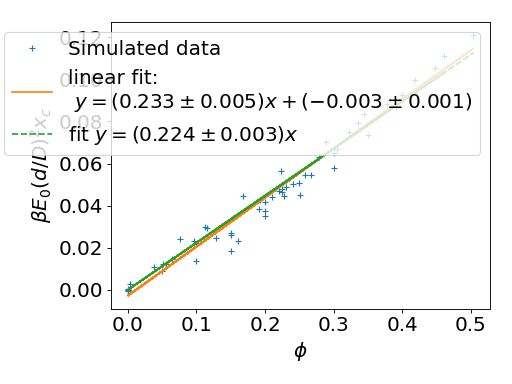

In [99]:
plt.figure()
plt.plot(phi_tot, e0_tot,'+', label='Simulated data')
plt.plot(phi_tot, popt[0]*np.array(phi_tot)+popt[1], label='linear fit:\n $y=(%.3f\pm%.3f)x+(%.3f\pm%.3f)$'%(popt[0],err[0],popt[1],err[1]))
plt.plot(phi_tot, p1[0]*np.array(phi_tot), '--', label=r'fit $y = (%.3f\pm%.3f)x$'%(p1[0],np.sqrt(c1[0])))
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta E_0 (d/D)^2x_c$')
plt.legend()
plt.tight_layout()

In [100]:
#plt.savefig('')

<IPython.core.display.Javascript object>


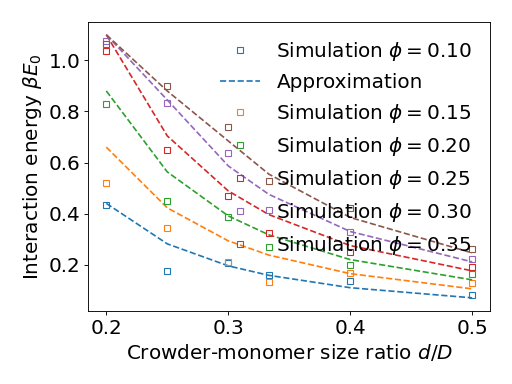

In [31]:
plt.figure()
plt.xlabel('Crowder-monomer size ratio $d/D$')
plt.ylabel('Interaction energy $\\beta E_0$')

phi_vec = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
order = np.argsort(np.array(dD))
dD_sor = np.array(dD)[order]
shell = (1+np.array(dD_sor))**3 - 1

E0_arr  = np.empty((len(phi_vec), len(dD)))
E0_plateau_appr = 0.22/dD_sor # Approximation for the plateau 
E0_plateau      = np.log(1+1.35/shell) # Plateau energy, from (v/v0)_plateau and the inverted mayer formula

ind = 0
for i in order: #iterate in the sorted order of the dD vector
    #extrapoler la valeur de E0 pour une courbe dD, pour 
    interp      = interp1d(phi[i], E0[i], kind='linear', bounds_error=False, fill_value=np.nan) #linear interp
    E0_arr[:,ind] = interp(phi_vec)
    ind = ind+1

for j in range(len(phi_vec)): 
    x          = phi_vec[j]/dD_sor
    E0_appr         = E0_plateau_appr/1.25/dD_sor*phi_vec[j]*(x<=1.25) + E0_plateau_appr*(x>1.25)
    E0_formul       = E0_plateau/1.25/dD_sor*phi_vec[j]*(x<=1.25) + E0_plateau*(x>1.25)

    if j==0: #This is to have only the legend for the 1st curve. There is probably another way
        plt.plot(dD_sor, E0_arr[j], 's', label='Simulation $\phi=%.2f$'%(phi_vec[j]), fillstyle='none')
        c = plt.gca().lines[-1].get_color()
        #plt.plot(dD_sor, E0_formul, '-', label='Formula', color=c)
        plt.plot(dD_sor, E0_appr, '--', label='Approximation', color=c)
    else:
        plt.plot(dD_sor, E0_arr[j], 's', fillstyle='none', label='Simulation $\phi=%.2f$'%(phi_vec[j]))
        c = plt.gca().lines[-1].get_color()
        #plt.plot(dD_sor, E0_formul, '-', color=c)
        plt.plot(dD_sor, E0_appr, '--', color=c)
plt.legend(frameon=False)
plt.tight_layout()

In [14]:
#plt.savefig('')

<IPython.core.display.Javascript object>


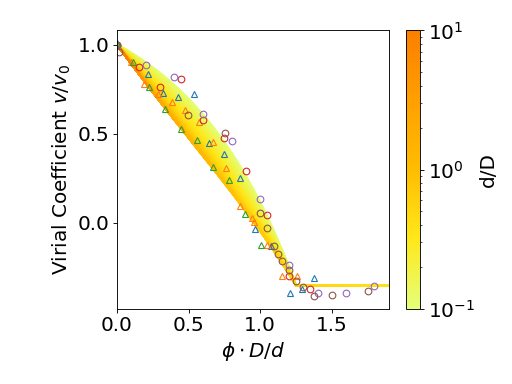

C:\Users\Quentin\AppData\Local\Temp\ipykernel_10776\2455801987.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cmap, label='d/D')


In [33]:
# prediction and limits of the formula
# Try to reach the limits of the collapse predicted by the formula

def my_vv0(phi, z):
    x    = phi/z
    E0_p = np.log(1+1.35/((1+z)**3-1))
    E0   = E0_p/1.25/z*phi*(x<=1.25) + E0_p*(x>1.25)
    return 1+(1-np.exp(E0))*((1+z)**3-1)



n_lines = 1000
phi_cb = np.linspace(0, 0.7, 1000) #x
#dD  = np.linspace(0.1, 5, n_lines) #c
dD_cb  = np.logspace(-1, 1, n_lines) #c
vv0_cb = my_vv0(phi_cb[:,None], dD_cb) #y
c_cb   = np.arange(1, n_lines + 1)

norm = mpl.colors.LogNorm(vmin=dD_cb.min(), vmax=dD_cb.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Wistia)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
plt.xlabel('$\phi\cdot D/d$')
plt.ylabel('Virial Coefficient $v/v_0$')
for i, yi in enumerate(vv0_cb.T):
    ax.plot(phi_cb/dD_cb[i], yi, c=cmap.to_rgba(dD_cb[i]))
for i in range(len(dD)):
    plt.plot(phi[i]/dD[i], vv0[i], tic[i], fillstyle='none')
fig.colorbar(cmap, label='d/D')
plt.tight_layout()
plt.xlim([0,1.9])
plt.show();

In [34]:
#plt.savefig('C:\\Users\\Quentin\\Documents\\DNA_cond\\figs\\fig3\\fig3_C_Wistia_largeRatio2.svg')

In [19]:

# settings

D   = 1
d   = 0.3
phi = 0.2
N   = 50

r_vec = np.linspace(0.9, 2, 210)

well = 10*np.heaviside(1-r_vec,1) - 0.4*np.heaviside(r_vec-1,1)*np.heaviside(1.5-r_vec,1)

plt.figure()
plt.xlabel('r/D')
plt.ylabel('$U(r)$')
plt.plot(r_vec, well, '-k',label='Cutoff formula')
plt.title('Square well potential'.format(N, phi, d/D))
#plt.grid()
#plt.legend()

In [87]:
plt.ylim([-0.5,0.3])
plt.tight_layout()

In [88]:
#plt.savefig('')

### 6. Plotting fig 4

In [ ]:
def normalizing(a, N):
    x = 3/5*N**(1/2)
    y = 1/5
    return a**5 - a**3 - y/a**3 - x

In [ ]:
# Ring Polymer by Chaihan et al.

ring_rg  = np.load('data\data_Chauhan\Chauhan_Rg.npy')
ring_phi = np.load('data\data_Chauhan\Chauhan_phi.npy')
ring_N   = 50
ring_dD  = 0.4

ring_ag  = ring_rg/max(ring_rg)
ring_f   = fsolve(lambda a: normalizing(a, 60), x0=1)

<IPython.core.display.Javascript object>


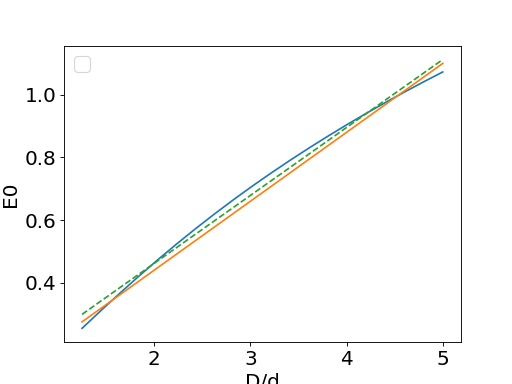

Text(0, 0.5, 'E0')

In [32]:
def formula_E0(Dd,vv0c):
    return np.log(1.+(1-vv0c)/((1+1/Dd)**3-1))

vv0c = -0.4
Dd = np.linspace(1/0.8,1/0.2,20)
f = np.polyfit(Dd,formula_E0(Dd,vv0c),1)
plt.figure()
plt.plot(Dd, formula_E0(Dd, vv0c),label='Without approximation')
plt.plot(Dd, 0.22*Dd, label='E0=0.22*D/d')
plt.plot(Dd, f[0]*Dd+f[1],'--', label='Fit: E0=%.3fD/d+%.3f'%(f[0], f[1]))
plt.legend()
plt.xlabel('D/d')
plt.ylabel('E0')

In [27]:
f

array([0.2168838 , 0.02792586])